In [16]:
#!pip install geopandas
#!pip install pycountry
#!pip install pycountry-convert
#!pip install mapclassify==2.4.3
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import geopandas as gpd
import re

In [17]:
#df = pd.read_csv('./final_preprocess_data.csv')
df = pd.read_csv("C:/Users/basha/Desktop/Final Year Project/FYP-main/FYP 2/data analysis/Alumni final dataset.csv")

#df

In [18]:
df['job_location'] = df['job_location'].apply(lambda x: x.replace("islamabad", "islamabad"))
df['job_location'] = df['job_location'].apply(lambda x: x.replace("karachi", "karachi"))
df['skills'] = df['skills'].apply(lambda x: x.replace("||", ","))

In [19]:
clist=['Afghanistan','Albania','Algeria','Andorra','Angola','Antigua & Deps','Argentina','Armenia','Australia','Austria','Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin','Bhutan','Bolivia','Bosnia Herzegovina','Botswana','Brazil','Brunei','Bulgaria','Burkina','Burundi','Cambodia','Cameroon','Canada','Cape Verde','Central African Rep','Chad','Chile','China','Colombia','Comoros','Congo','Congo {Democratic Rep}','Costa Rica','Croatia','Cuba','Cyprus','Czech Republic','Denmark','Djibouti','Dominica','Dominican Republic','East Timor','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Ethiopia','Fiji','Finland','France','Gabon','Gambia','Georgia','Germany','Ghana','Greece','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland ','Israel','Italy','Ivory Coast','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','Korea North','Korea South','Kosovo','Kuwait','Kyrgyzstan','Laos','Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania','Luxembourg','Macedonia','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta','Marshall Islands','Mauritania','Mauritius','Mexico','Micronesia','Moldova','Monaco','Mongolia','Montenegro','Morocco','Mozambique','Myanmar','Namibia','Nauru','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria','Norway','Oman','Pakistan','Palau','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Qatar','Romania','Russian Federation','Rwanda','St Kitts & Nevis','St Lucia','Saint Vincent & the Grenadines','Samoa','San Marino','Sao Tome & Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone','Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Sudan','Spain','Sri Lanka','Sudan','Suriname','Swaziland','Sweden','Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Togo','Tonga','Trinidad & Tobago','Tunisia','Turkey','Turkmenistan','Tuvalu','Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan','Vanuatu','Vatican City','Venezuela','Vietnam','Yemen','Zambia','Zimbabwe']
for i in range(len(clist)):
    clist[i] = clist[i].lower()    
#clist

In [20]:
reg = '(%s)' % '|'.join(clist)
df['CountryName'] = df['job_location'].str.extract(reg)
#df

In [21]:
df

,Name,Current_Company,Current_Job,Experience,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills,CountryName
0,abrar javed,upwork,professional freelancer,1,pakistan,bs electrical engineering,2015,2020,fast nuces,/in/abrar-javed-49854b14b/,"management,microsoft excel,customer service,st...",pakistan
1,mahrukh fatima,devbunch private limited,project coordinator,1,lahore pakistan,bachelor of business administration (bba),2014,2018,fast nuces,/in/mahrukh-fatima-60b863106/,"microsoft office,customer service,microsoft ex...",pakistan
2,neha nadeem,daraz,data analyst,1,united states,bachelor of science in computer science,2016,2020,fast nuces,/in/nehanadeem/,"business intelligence (bi),data analysis,data ...",united states
3,abdul rafeh,no joke marketing,corporate marketing manager,1,united states,master's degree,2017,2018,fast nuces,/in/rafeh11/,"microsoft office,microsoft excel,powerpoint,re...",united states
4,areeba ayyaz,keeptruckin,software engineer,1,lahore pakistan,bachelor of science in computer science,2016,2020,fast nuces,/in/areeba-ayyaz-6948071a3/,"java,ruby on rails,problem solving,android dev...",pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...
4698,nust uni,fast nuces,software engineer,1,lahore pakistan,bachelor's degree,2016,2016,fast nuces,/in/nust-uni-181a20162/,"c,java,html,programming,software development,o...",pakistan
4699,shayan ahmad,playtech,java developer,1,"london, england, united kingdom",bachelor of science (bs),2012,2016,fast nuces,/in/yansha/,"c++,c,embedded c,object-oriented programming (...",united kingdom
4700,hamza sheikh,eers global technologies inc.,advanced embedded developer,2,canada,master of engineering - meng,2018,2019,queen's university - faculty of engineering an...,/in/hamzasheikh876/,"communication,design,front end development,ana...",canada
4701,fizza surahio,wavetec,software quality assurance,1,karachi pakistan,bachelor's degree,2018,2021,fast nuces,/in/fizza-surahio-3143511b3/,"python,data science,machine learning,research,...",pakistan


##### Impute / Replace Missing Values with Mode

In [22]:
df['CountryName'] = df['CountryName'].fillna(df['CountryName'].mode()[0])

In [23]:
#df['country'].head(40)

In [24]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    CODE1=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.CountryName)
#df.head()

In [25]:
df_value_counts=df["CountryName"].value_counts()
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['CountryName', 'Alumni']
df_value_counts.CountryName = df_value_counts.CountryName.str.title()
df_value_counts.head(10)

,CountryName,Alumni
0,Pakistan,3392
1,Australia,379
2,Canada,175
3,United Kingdom,135
4,Germany,127
5,United States,109
6,United Arab Emirates,88
7,Saudi Arabia,45
8,Sweden,28
9,Malaysia,19


In [26]:
# generate country code  based on country name 
import pycountry 
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def alpha2code(column):
    CODE=[]
    COUNTRY=[]
    COUNTRY1=[]
    CONTINENT=[]
    for country in column:
        try:
            code=(pycountry.countries.get(name=country).alpha_2,country_alpha2_to_continent_code(pycountry.countries.get(name=country).alpha_2))
            countr=pycountry.countries.get(name=country).alpha_2
            countr1=pycountry.countries.get(name=country).alpha_3
            conti=country_alpha2_to_continent_code(pycountry.countries.get(name=country).alpha_2)      

            CODE.append(code)
            COUNTRY.append(countr)
            COUNTRY1.append(countr1)
            CONTINENT.append(conti)
        except:
            CODE.append('None')
            COUNTRY.append('None')
            COUNTRY1.append('None')
            CONTINENT.append('None')

    return (CODE,COUNTRY,CONTINENT,COUNTRY1)
# create a column for code 
(df_value_counts['Code'],df_value_counts['Country'],df_value_counts['Continent'],df_value_counts['CODE']) =alpha2code(df_value_counts.CountryName)

df_value_counts.head()

,CountryName,Alumni,Code,Country,Continent,CODE
0,Pakistan,3392,"(PK, AS)",PK,AS,PAK
1,Australia,379,"(AU, OC)",AU,OC,AUS
2,Canada,175,"(CA, NA)",CA,NA,CAN
3,United Kingdom,135,"(GB, EU)",GB,EU,GBR
4,Germany,127,"(DE, EU)",DE,EU,DEU


In [27]:
#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
 
#Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="my_request")
 
#applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
#Applying the method to pandas DataFrame
df_value_counts['Geolocate'] = df_value_counts['CountryName'].apply(geocode)
df_value_counts['Latitude'] = df_value_counts['Geolocate'].apply(lambda x: x.latitude if x else None)
df_value_counts['Longitude'] = df_value_counts['Geolocate'].apply(lambda x: x.longitude if x else None)

 
df_value_counts.head()

,CountryName,Alumni,Code,Country,Continent,CODE,Geolocate,Latitude,Longitude
0,Pakistan,3392,"(PK, AS)",PK,AS,PAK,"(پاکستان, (30.3308401, 71.247499))",30.330840,71.247499
1,Australia,379,"(AU, OC)",AU,OC,AUS,"(Australia, (-24.7761086, 134.755))",-24.776109,134.755000
2,Canada,175,"(CA, NA)",CA,NA,CAN,"(Canada, (61.0666922, -107.991707))",61.066692,-107.991707
3,United Kingdom,135,"(GB, EU)",GB,EU,GBR,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575
4,Germany,127,"(DE, EU)",DE,EU,DEU,"(Deutschland, (51.0834196, 10.4234469))",51.083420,10.423447


In [28]:
df_value_counts.to_csv('world_map.csv')


# Create a world map

In [29]:
#title Default title text
#installation
#!pip install folium
# Create a world map to show distributions of of Alumni  
import folium
from folium.plugins import MarkerCluster
#empty map
world_map = folium.Map()
#world_map= folium.Map(tiles="cartodbpositron")  #cartodbdark_matter  cartodbpositron, Stamen Toner
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df_value_counts)):
        lat = df_value_counts.iloc[i]['Latitude']
        longn = df_value_counts.iloc[i]['Longitude']
        radius=10
        popup_text = """<div style="background-color: lightyellow; color: black; padding: 3px; border: 2px solid black; border-radius: 3px;"> Country: {}<br> # of Alumni: {}<br> </div>"""
        popup_text = popup_text.format(df_value_counts.iloc[i]['CountryName'],
                                   df_value_counts.iloc[i]['Alumni']
                                   )

        folium.CircleMarker(location = [lat, longn], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

## Data Visualization: How To Plot A Map with Geopandas in Python

In [42]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df_value_counts,on='CODE')


C:\Users\basha\.conda\envs\myenv\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\basha\.conda\envs\myenv\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


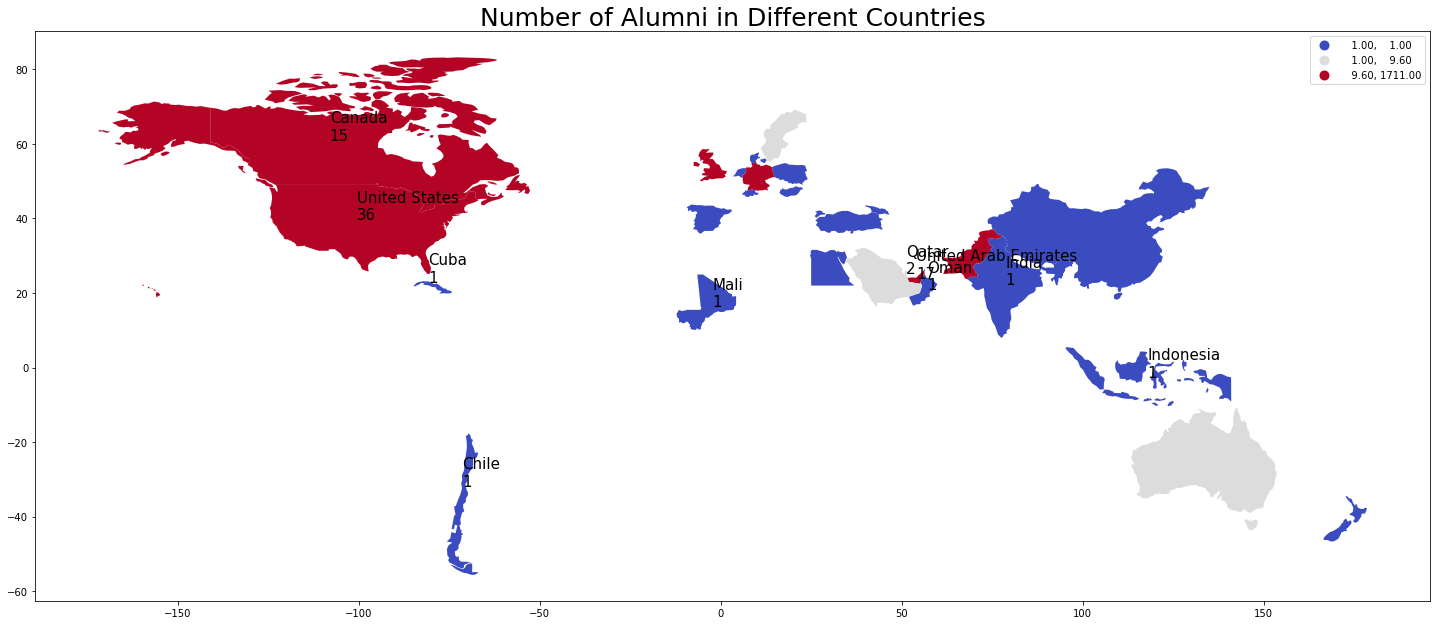

In [43]:
# plot Number of Alumni world map 

merge.plot(column='Alumni', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Number of Alumni in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.Longitude[i]),float(merge.Latitude[i]),"{}\n{}".format(merge.CountryName[i],merge.Alumni[i]),size=15)
plt.show()

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['Current_Job','Current_Company','Total_year','job_location','Last_University','Last_degree','Graduation_end_year'],return_df=True)
df=encoder.fit_transform(df)
df

,Name,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills,CountryName,Country,CODE
0,abrar javed,1,1,1,1,1,2015,1,1,/in/abrar-javed-49854b14b/,"management,microsoft excel,customer service,st...",pakistan,pakistan,PAK
1,mahrukh fatima,2,2,2,2,2,2014,2,1,/in/mahrukh-fatima-60b863106/,"microsoft office,customer service,microsoft ex...",pakistan,pakistan,PAK
2,neha nadeem,3,3,3,3,3,2016,1,1,/in/nehanadeem/,"business intelligence (bi),data analysis,data ...",united states,united states,USA
3,abdul rafeh,4,4,2,4,4,2017,2,1,/in/rafeh11/,"microsoft office,microsoft excel,powerpoint,re...",united states,united states,USA
4,areeba ayyaz,5,5,4,5,3,2016,1,1,/in/areeba-ayyaz-6948071a3/,"java,ruby on rails,problem solving,android dev...",pakistan,pakistan,PAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,muhammad siddique,643,750,1,2,207,2020,1,186,/in/muhammad-siddique-58480117/,"market research,marketing management,team mana...",pakistan,pakistan,PAK
2129,agha hamza waheed,1265,751,233,2,6,2012,8,1,/in/agha-hamza-waheed-bb2384b1/,"microsoft office,team management,auditing,fina...",pakistan,pakistan,PAK
2130,mian muhammad faizan elahi,100,752,416,5,10,2020,7,44,/in/mian-muhammad-faizan-elahi/,"business analytics,digital marketing,search en...",pakistan,pakistan,PAK
2131,hajra arshad,1266,1,196,9,10,2020,7,19,/in/hajra-arshad/,"adobe photoshop,microsoft excel,microsoft word...",pakistan,pakistan,PAK


In [18]:
df.corr()

,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_end_year,Last_University
Current_Company,1.000000,0.390651,0.451551,0.171329,0.206330,0.136095,0.214329
Current_Job,0.390651,1.000000,0.304366,0.098939,0.151052,0.070487,0.147288
Total_year,0.451551,0.304366,1.000000,0.127285,0.199131,0.229875,0.183485
job_location,0.171329,0.098939,0.127285,1.000000,0.119473,0.047437,0.188402
Last_degree,0.206330,0.151052,0.199131,0.119473,1.000000,0.127134,0.349938
Graduation_end_year,0.136095,0.070487,0.229875,0.047437,0.127134,1.000000,0.106928
Last_University,0.214329,0.147288,0.183485,0.188402,0.349938,0.106928,1.000000


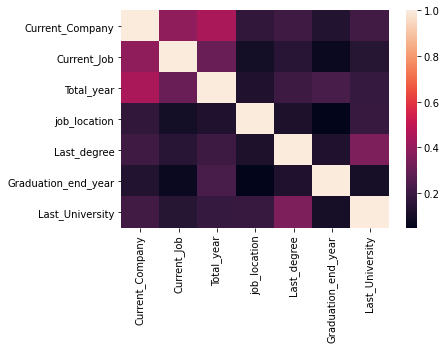

In [18]:
sns.heatmap(df.corr());


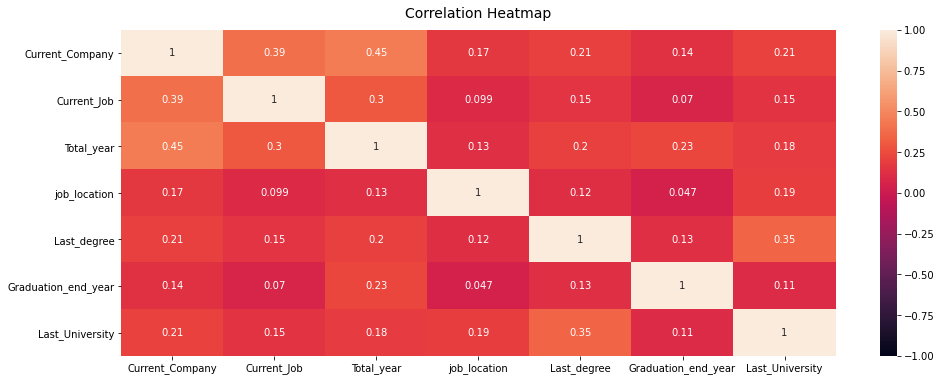

In [19]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

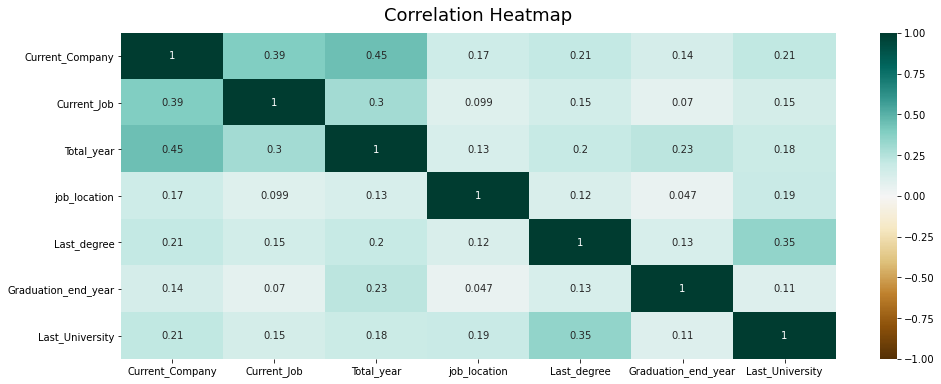

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [22]:
np.triu(np.ones_like(df.corr()))


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

<ipython-input-24-883e47a13233>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


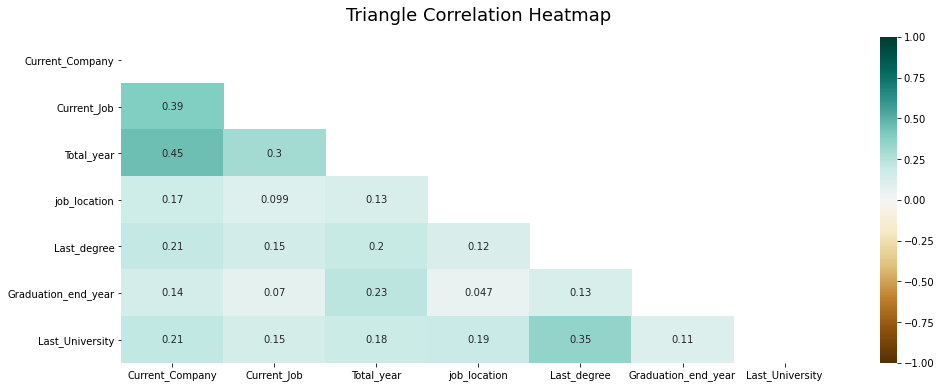

In [24]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [25]:
df.corr()[['Current_Job']].sort_values(by='Current_Job', ascending=False)

,Current_Job
Current_Job,1.000000
Current_Company,0.390651
Total_year,0.304366
Last_degree,0.151052
Last_University,0.147288
job_location,0.098939
Graduation_end_year,0.070487


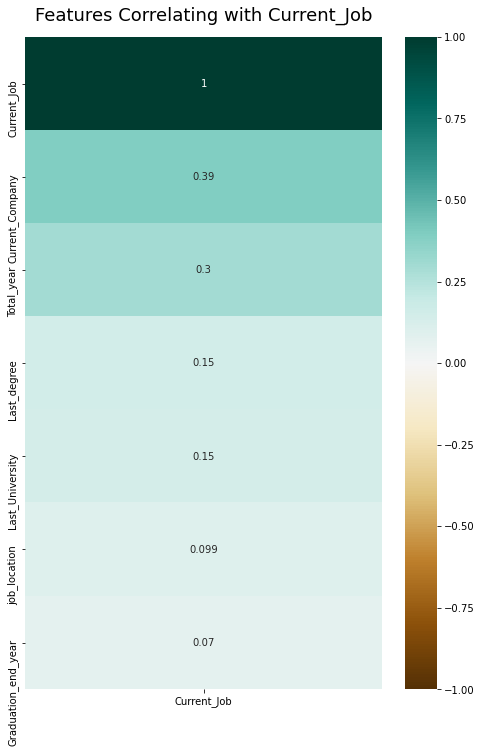

In [26]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Current_Job']].sort_values(by='Current_Job', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Current_Job', fontdict={'fontsize':18}, pad=16);

In [62]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()

NameError: name 'geopandas' is not defined

In [2]:
d = pd.DataFrame( {
   'A': ['d','d','d','f','f','f','g','g','g','h','h','h'],
   'B': [5,5,6,7,5,6,6,7,7,6,7,7],
   'C': [1,1,1,1,1,1,1,1,1,1,1,1],
   'S': [2012,2013,2014,2015,2016,2012,2013,2014,2015,2016,2012,2013]     
    } );

d

,A,B,C,S
0,d,5,1,2012
1,d,5,1,2013
2,d,6,1,2014
3,f,7,1,2015
4,f,5,1,2016
5,f,6,1,2012
6,g,6,1,2013
7,g,7,1,2014
8,g,7,1,2015
9,h,6,1,2016


In [3]:
d = (d.B + d.C).groupby([d.A, d.S]).sum().unstack(fill_value=0)
print (d)

S  2012  2013  2014  2015  2016
A                              
d     6     6     7     0     0
f     7     0     0     8     6
g     0     7     8     8     0
h     8     8     0     0     7
